### Importing libraries 

In [254]:
import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

### Importing Data

In [255]:
df = pd.read_csv('../data/ytdataframe.csv')

dff = pd.read_csv('../data/ytlabeled.csv')


In [256]:
df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label
0,0,-SejlHOXexc,Tech Tutorial,How to download facebook stories in your phone,Hey friends today we have another great topic ...,"['facebook stories in your phone', 'download f...",2019-11-02T14:25:35Z,969772,11114,NaN,338,PT3M55S,hd,False,140000,8679674,161,0.008202,non reputable
1,1,set4Kr8hX0w,Tech Tutorial,How to check whatsapp lastseen if hidden or bl...,Hello friends welcome to my channel Our today...,['How to check whatsapp lastseen if hidden or ...,2018-01-20T15:35:36Z,1480465,11945,NaN,860,PT4M44S,hd,False,140000,8679674,161,0.298687,non reputable
2,2,s4EYU1ptpIs,Tech Tutorial,How to change voice during call | Male female ...,Hey friends today we have another great topic ...,"['How to change voice during call', 'voice cha...",2021-11-30T17:37:11Z,553266,9277,NaN,335,PT5M21S,hd,False,140000,8679674,161,0.295888,non reputable
3,3,-lcPJAa6trw,Tech Tutorial,How to check who read my message in whatsapp g...,Hey friends today we have another great topic ...,['how to check who read message in whatsapp gr...,2018-05-07T15:12:51Z,324099,5371,NaN,266,PT3M,hd,False,140000,8679674,161,0.296792,non reputable
4,4,G1F6W7QhrWU,Tech Tutorial,How to Record Messenger calls -facebook messen...,Hey friends today we have another great topic ...,"['How to Record Messenger calls', 'facebook me...",2021-10-07T16:18:54Z,43140,327,NaN,23,PT4M23S,hd,False,140000,8679674,161,0.296837,non reputable


In [257]:
df.describe()

,Unnamed: 0,viewCount,likeCount,favouriteCount,commentCount,subscribers,totalViews,totalVideos,avg polarity score
count,160.000000,1.600000e+02,160.000000,0.0,160.000000,1.600000e+02,1.600000e+02,160.00000,160.000000
mean,79.500000,3.921978e+05,8944.556250,NaN,392.837500,6.775978e+05,4.409150e+07,4838.20000,0.338064
std,46.332134,9.824008e+05,21245.524519,NaN,824.083412,1.298546e+06,8.267774e+07,38076.02125,0.092491
min,0.000000,1.880000e+02,2.000000,NaN,0.000000,8.000000e+00,4.940000e+02,4.00000,0.000000
25%,39.750000,1.285625e+04,102.000000,NaN,18.750000,4.270000e+03,5.641192e+05,81.00000,0.316482
50%,79.500000,5.631750e+04,1315.000000,NaN,133.000000,1.400000e+05,8.679674e+06,218.00000,0.340861
75%,119.250000,2.704578e+05,8275.250000,NaN,360.750000,6.430000e+05,5.953507e+07,682.75000,0.342008
max,159.000000,8.147308e+06,146382.000000,NaN,5373.000000,6.130000e+06,4.108876e+08,342151.00000,0.865800


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          160 non-null    int64  
 1   video_id            160 non-null    object 
 2   channelTitle        160 non-null    object 
 3   title               160 non-null    object 
 4   description         160 non-null    object 
 5   tags                145 non-null    object 
 6   publishedAt         160 non-null    object 
 7   viewCount           160 non-null    int64  
 8   likeCount           160 non-null    int64  
 9   favouriteCount      0 non-null      float64
 10  commentCount        160 non-null    int64  
 11  duration            160 non-null    object 
 12  definition          160 non-null    object 
 13  caption             160 non-null    bool   
 14  subscribers         160 non-null    int64  
 15  totalViews          160 non-null    int64  
 16  totalVid

In [259]:
dff = dff.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
dff.head()

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,video_id,avg polarity score,channelTitle,title,description,...,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos,Label
0,0,0,0.0,0.0,0.0,jGwO_UgTS7I,0.277473,Stanford Online,"Stanford CS229: Machine Learning Course, Lectu...",For more information about Stanford’s Artifici...,...,18797,NaN,76,PT1H15M20S,hd,True,369000,20517888,1850,0
1,1,1,1.0,1.0,1.0,4b4MUYve_U8,0.234844,Stanford Online,Stanford CS229: Machine Learning - Linear Regr...,For more information about Stanford’s Artifici...,...,6564,NaN,31,PT1H18M17S,hd,True,369000,20517888,1850,0
2,2,2,2.0,2.0,2.0,het9HFqo1TQ,0.236257,Stanford Online,Locally Weighted & Logistic Regression | Stanf...,For more information about Stanford’s Artifici...,...,2629,NaN,10,PT1H19M34S,hd,True,369000,20517888,1850,0
3,3,3,3.0,3.0,3.0,iZTeva0WSTQ,0.237893,Stanford Online,Lecture 4 - Perceptron & Generalized Linear Mo...,For more information about Stanford’s Artifici...,...,1091,NaN,3,PT1H22M2S,hd,True,369000,20517888,1850,0
4,4,4,4.0,4.0,4.0,nt63k3bfXS0,0.244639,Stanford Online,Lecture 5 - GDA & Naive Bayes | Stanford CS229...,For more information about Stanford’s Artifici...,...,1291,NaN,8,PT1H18M52S,hd,True,369000,20517888,1850,0


# Data preprocessing & EDA

Checking duplicates

In [260]:
df.duplicated().sum()


0

In [261]:
df = df.drop_duplicates()
df.shape

(160, 19)

Checking null values

In [262]:
df.isnull().sum()


Unnamed: 0              0
video_id                0
channelTitle            0
title                   0
description             0
tags                   15
publishedAt             0
viewCount               0
likeCount               0
favouriteCount        160
commentCount            0
duration                0
definition              0
caption                 0
subscribers             0
totalViews              0
totalVideos             0
avg polarity score      0
Label                   0
dtype: int64

Convert publish date to year

In [263]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y"))

dff['publishedAt'] = dff['publishedAt'].apply(lambda x: parser.parse(x)) 
dff['pushblishYear'] = dff['publishedAt'].apply(lambda x: x.strftime("%Y"))

Convert count columns to numeric

In [264]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount', 'pushblishYear']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

dff[numeric_cols] = dff[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

### Features engineering 

Convert duration to seconds

In [265]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

dff['durationSecs'] = dff['duration'].apply(lambda x: isodate.parse_duration(x))
dff['durationSecs'] = dff['durationSecs'].astype('timedelta64[s]')

Add tag count

In [266]:


df['tagCount'] = df['tags'].apply(lambda x: 0 if x is np.nan else len(x))

dff['tagCount'] = dff['tags'].apply(lambda x: 0 if x is np.nan else len(x))

Add title and description length

In [267]:
df['title length'] = df['title'].apply(lambda x: 0 if x is np.nan else len(x))
df['description length'] = df['description'].apply(lambda x: 0 if x is np.nan else len(x))

dff['title length'] = dff['title'].apply(lambda x: 0 if x is np.nan else len(x))
dff['description length'] = dff['description'].apply(lambda x: 0 if x is np.nan else len(x))


In [268]:
dff['Label'] = dff['Label'].apply(lambda x: 'non reputable' if x == 0 else 'reputable')

In [269]:
# new_cols = ["channelTitle","viewCount",'likeCount','definition','commentCount','caption','subscribers','totalViews','totalVideos','avg polarity score','pushblishYear','durationSecs','tagCount','title length','description length']
# dff=dff[new_cols]
# #or
# dff=dff.reindex(columns=new_cols)

Appending data

In [270]:
df = df.append(dff)

df.shape

C:\Users\wled3\AppData\Local\Temp\ipykernel_34484\3834822456.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dff)


(636, 29)

Dropping columns we wont use

In [271]:
df = df.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)



### Label distribution 

reputable        429
non reputable    207
Name: Label, dtype: int64

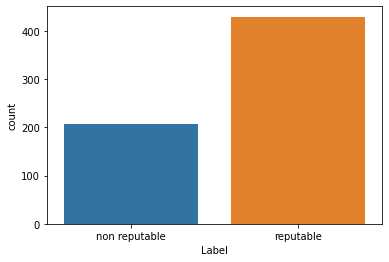

In [272]:
sns.countplot(x="Label", data=df)
df["Label"].value_counts()

Our data is unbalanced so we might need oversampling

In [273]:
# sns.scatterplot(x="commentCount", y="durationSecs", hue="Label", data = df)

c:\Python310\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


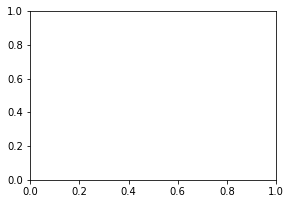

In [274]:
df_dist = df.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.kdeplot(x=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

Label encoding 

In [275]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2 = ['channelTitle', 'definition', 'caption', 'Label']

df[df2] = df[df2].apply(le.fit_transform)

dffs = ['channelTitle', 'definition', 'caption']
dff[dffs] = dff[dffs].apply(le.fit_transform)



df.head(1)

,channelTitle,viewCount,likeCount,commentCount,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,...,pushblishYear,durationSecs,tagCount,title length,description length,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2
0,34,969772,11114,338,0,0,140000,8679674,161,0.008202,...,2019,235.0,412,46,1193,NaN,NaN,NaN,NaN,NaN


Correlation map

<AxesSubplot:>

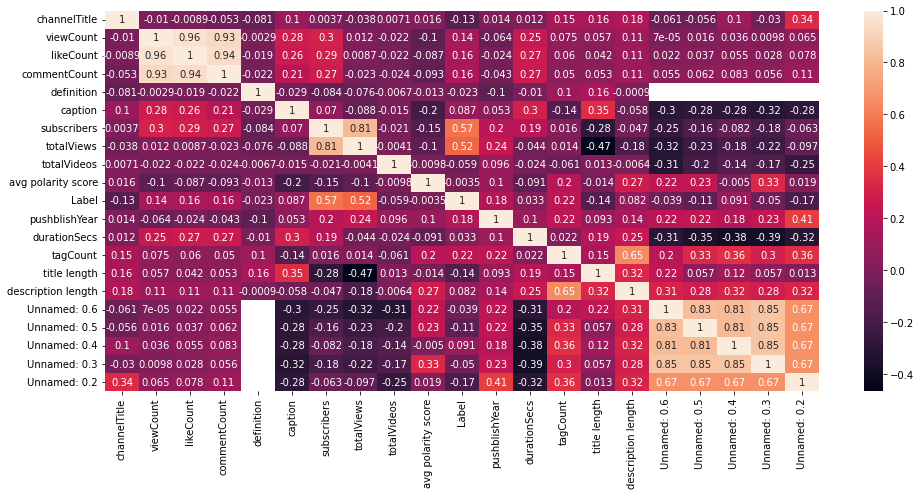

In [276]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(), annot = True)

Scaling

In [277]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()

feat_col = ['channelTitle', 'viewCount', 'likeCount', 'definition', 'commentCount', 'caption', 'subscribers', 'totalViews', 'totalVideos', 'avg polarity score', 'pushblishYear', 'durationSecs', 'tagCount', 'description length', 'title length']

X = df[feat_col] # Features
y = df['Label']# Target variable


# Modeling

In [278]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Splitting data

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [280]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [281]:
from sklearn.metrics import classification_report
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, y_pred, target_names=target_names))
print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

               precision    recall  f1-score   support

    reputable       0.93      0.91      0.92        45
non reputable       0.97      0.97      0.97       114

     accuracy                           0.96       159
    macro avg       0.95      0.94      0.95       159
 weighted avg       0.96      0.96      0.96       159

Train Accuracy: 0.9371069182389937
Test Accuracy: 0.9559748427672956


In [282]:
from random import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())

Mean AUC Score - Logistic Regression:  0.9639710492683397


# Testing different models

### Random Forest

In [283]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
kfold = KFold(n_splits=3, random_state=16, shuffle=True) 
scores = cross_val_score(model1, X_train, y_train, cv=kfold, scoring='roc_auc')
print("Mean AUC Score - Random Forest: ", scores.mean())

Mean AUC Score - Random Forest:  0.9895370289486349


In [284]:
# fit the model with data
model1.fit(X_train, y_train)

rf_pred = model1.predict(X_test)

print("Random Forest Train Accuracy:",model1.score(X_train, y_train))
print("Random Forest Test Accuracy:",model1.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, rf_pred, target_names=target_names))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9748427672955975
               precision    recall  f1-score   support

    reputable       0.98      0.93      0.95        45
non reputable       0.97      0.99      0.98       114

     accuracy                           0.97       159
    macro avg       0.98      0.96      0.97       159
 weighted avg       0.97      0.97      0.97       159



### Decision Tree

In [285]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model2, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Decision Tree: ", scores.mean())

Mean AUC Score - Decision Tree:  0.93710481822751


In [286]:
# fit the model with data
model2.fit(X_train, y_train)

dc_pred = model2.predict(X_test)

print("Train Accuracy:",model2.score(X_train, y_train))
print("Test Accuracy:",model2.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, dc_pred, target_names=target_names))


Train Accuracy: 1.0
Test Accuracy: 0.9748427672955975
               precision    recall  f1-score   support

    reputable       0.98      0.93      0.95        45
non reputable       0.97      0.99      0.98       114

     accuracy                           0.97       159
    macro avg       0.98      0.96      0.97       159
 weighted avg       0.97      0.97      0.97       159



### XGBClassifier

In [287]:
from xgboost import XGBClassifier
model4 = XGBClassifier()
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model4, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Gaussian Naive Bayes: ", scores.mean())

Mean AUC Score - Gaussian Naive Bayes:  0.988174909383425


In [288]:
# fit the model with data
model4.fit(X_train, y_train)

xgb_pred = model4.predict(X_test)

print("XGB Train Accuracy:",model4.score(X_train, y_train))
print("XGB Test Accuracy:",model4.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, xgb_pred, target_names=target_names))

XGB Train Accuracy: 1.0
XGB Test Accuracy: 0.9748427672955975
               precision    recall  f1-score   support

    reputable       0.98      0.93      0.95        45
non reputable       0.97      0.99      0.98       114

     accuracy                           0.97       159
    macro avg       0.98      0.96      0.97       159
 weighted avg       0.97      0.97      0.97       159



### K-Nearest Neighbors

In [289]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
cross_val = KFold(n_splits=3, random_state=16, shuffle=True)
scores = cross_val_score(model5, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - K-Nearest Neighbors: ", scores.mean())

Mean AUC Score - K-Nearest Neighbors:  0.9656428101197756


In [290]:
# fit the model with data
model5.fit(X_train, y_train)

k_pred = model5.predict(X_test)

print("KNN Train Accuracy:",model5.score(X_train, y_train))
print("KNN Test Accuracy:",model5.score(X_test, y_test))

KNN Train Accuracy: 0.9538784067085954
KNN Test Accuracy: 0.9559748427672956


In [291]:
from sklearn.metrics import classification_report

target_names = ['reputable', 'non reputable']
print(classification_report(y_test, k_pred, target_names=target_names))

               precision    recall  f1-score   support

    reputable       0.95      0.89      0.92        45
non reputable       0.96      0.98      0.97       114

     accuracy                           0.96       159
    macro avg       0.95      0.94      0.94       159
 weighted avg       0.96      0.96      0.96       159



From the 5 scores above the top 3 performers were Logistic Regression,XGBClassifier and K-Neasrest Neighbors. We will move ahead and fine tune them.

# Hyper parameters tuning

In [292]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'C': np.linspace(.0001, 1000, 200) , 'penalty': ["l2"]}]
clf = GridSearchCV(logreg, tuned_parameters, cv=cross_val, scoring= 'roc_auc')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print("\nOptimized model achieved an ROC of:", round(clf.score(X_train, y_train), 4))
print("LogReg Train Accuracy:",clf.score(X_train, y_train))
print("LogReg Test Accuracy:",clf.score(X_test, y_test))

Best parameters set found on development set:

{'C': 10.050350251256281, 'penalty': 'l2'}

Optimized model achieved an ROC of: 0.9702
LogReg Train Accuracy: 0.9702331961591222
LogReg Test Accuracy: 0.9869395711500974


# Save model

In [293]:
import pickle

pickle.dump(clf, open('LogRegModelFinal', 'wb'))